Tuodaan kirjastot

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Lisätään data data frameen

In [3]:
titanic_df = pd.read_csv('./titanic/data_labelled.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* PassengerId: Matkustaja id
* Survived: Selviytynyt (0 = Ei, 1 = Kyllä) 
* Pclass: Yhteiskuntaluokka (int: 1 = Yläluokka; 2 = Keskiluokka; 3 = Alaluokka)
* Name: Matkustajan nimi (string)
* Sex: Sukupuoli (string)
* Age: Ikä (float)
* SibSp: Sisarusten ja puolisoiden määrä laivalla(int)
* Parch: Vanhempien ja lasten lukumäärä laivalla (int)
* Ticket: Matkustuslipun numero (string)
* Fare: Matkustuslipun hinta (float)
* Cabin: Hytin numero (string)
* Embarked: Lähtösatama (string: C = Cherbourg; Q = Queenstown; S = Southampton)

Visualisoidaan dataa kaavioilla

In [6]:
def barplot(feature):
    plt.subplots(figsize=(20,5))
    x = titanic_df[feature].unique()
    try:
        x.sort()
    except TypeError:
        pass
    x.tolist()
    y = [titanic_df[titanic_df[feature]==value][feature].count() for value in x]
    ax = sns.barplot(x=x, y=y)
    plt.show

In [7]:
def distplot(feature):
    plt.subplots(figsize=(20,5))
    data = titanic_df[feature].copy()
    data = data.dropna()
    if isinstance(data.iloc[0], str):
        print('Only use distplot for numerical data!')
        return
    ax = sns.distplot(data)
    plt.show

In [8]:
def survived_by_x(feature):
    plt.subplots(figsize=(20,5))
    sns.countplot(feature, hue='Survived',data=titanic_df)
    plt.show()

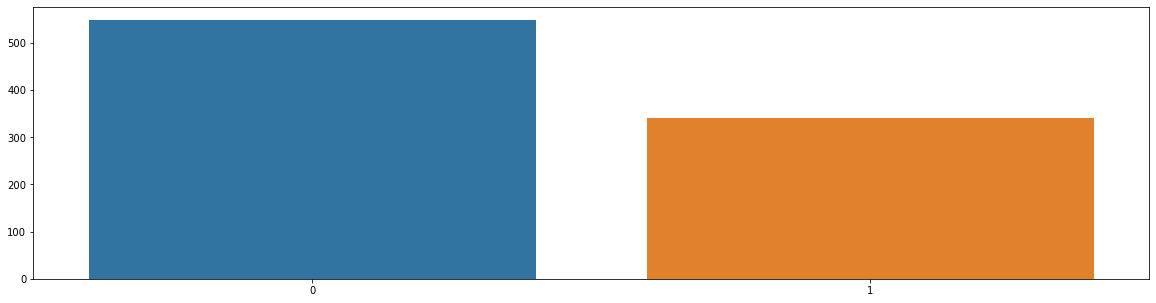

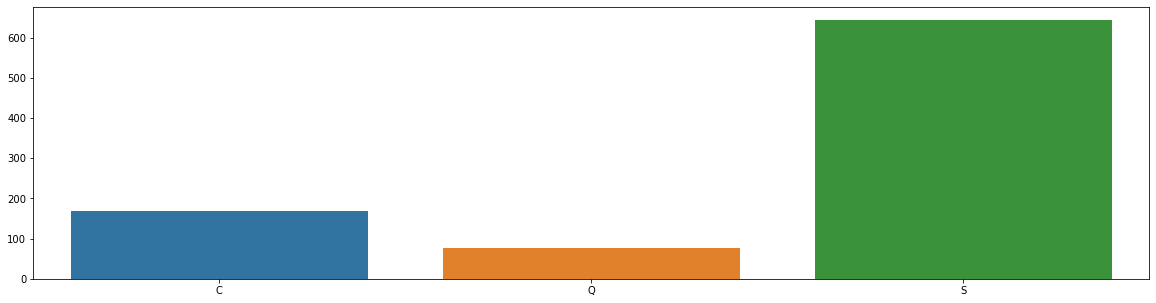

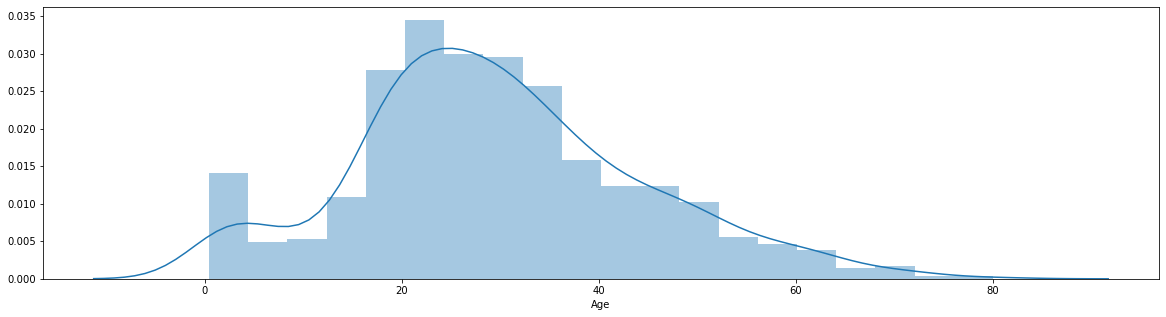

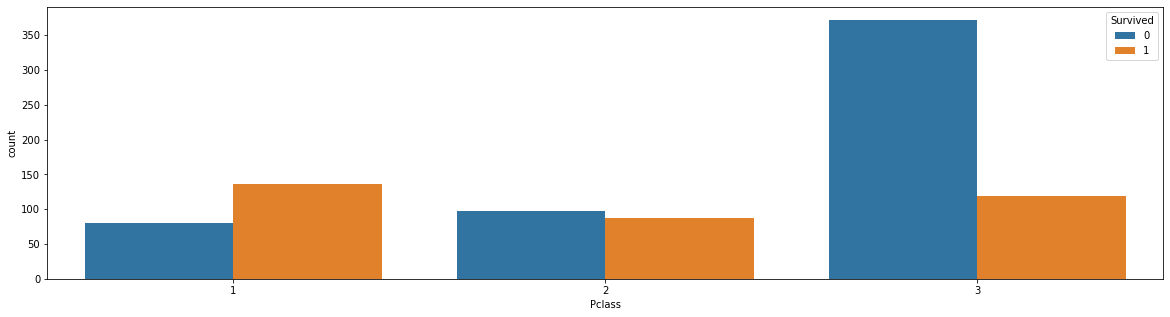

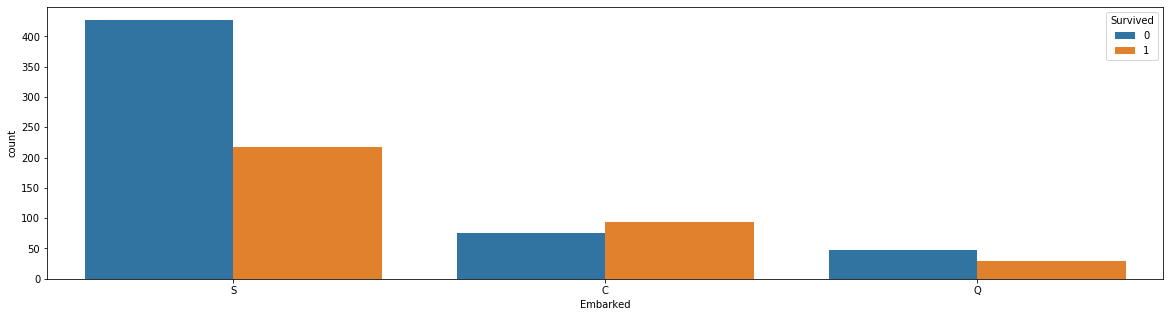

In [14]:
barplot("Survived")
barplot("Embarked")
distplot("Age")
survived_by_x("Pclass")
survived_by_x("Embarked")

Nähdään jo nyt miten matkusluokka ja lähtösatama vaikuttaa selviytymismahdollisuuksiin, laiva lähti Southamptonista ja suurin osa ensimmäisenä laivaan nousseista kuoli, sillä he ovat luultavasti joutuneet syvemmälle laivan sisään.

Seuraavaksi täydennetään puutuvat kohdat datasta

In [15]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Täytetään puuttuvat kohdasta datasta keskiarvolla ja moodilla. (Ikä ja lähtösatama)

In [16]:
def fill_with_mean(feature, replace_zeros=False):
    # Fill NaN with mean
    mean = int(titanic_df[feature].mean())
    titanic_df[feature].fillna(mean, inplace=True)
    print(f"The mean of feature {feature} is {mean}")
    if replace_zeros:
        # Fill 0 with mean
        titanic_df[feature].mask(int(titanic_df[feature]==0, titanic_df[feature].mean()), inplace=True)

In [17]:
def fill_with_modus(feature):
    # Calculate Modus
    modus = None
    no_of_observations_for_modus = 0
    for value in titanic_df[feature].unique():
        no_of_observations = len(titanic_df[titanic_df[feature] == value])
        if no_of_observations >= no_of_observations_for_modus:
            no_of_observations_for_modus = no_of_observations
            modus = value
    print(f"The Modus of feature {feature} is {modus}.")
    
    # Fill NaN with modus
    titanic_df[feature].fillna(modus, inplace=True)

In [18]:
fill_with_mean("Age")
fill_with_modus("Embarked")
titanic_df.info()

The mean of feature Age is 29
The Modus of feature Embarked is S.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Seuraavaksi poistetaan kolumnit, joilla ei merkitystä ihmisten selviytymisen kannalta.

In [21]:
titanic_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

Annetaan sukupuolelle indeksit (Mies = 0, Nainen = 1) ja lisätään jokaiselle lähtösatamalle oma kolumni.

In [22]:
dict_sex = {'male': 0, 'female':1}
titanic_df['Sex'] = titanic_df['Sex'].map(dict_sex)
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'])
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


In [23]:
titanic_df.to_csv('./titanic/data_clean1.csv', index=False)